### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler





### Data Analysis and Features selection

In [2]:
patient_112 = pd.read_csv('Patient 112_data.csv')

In [3]:
patient_112.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,...,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000,10065.000000
mean,0.047854,0.239974,0.580479,0.975956,1.757435,5.808649,1.325176,1.061641,1.016180,1.003576,...,1.851346,1.851935,1.817646,1.804134,0.942501,1.577315,2.023780,2.059835,1.971711,50.992350
std,0.015967,0.019466,0.018260,0.017464,0.011032,3.213810,0.104248,0.019089,0.011471,0.001421,...,0.030887,0.030994,0.019926,0.023255,0.097482,0.040063,0.010907,0.001120,0.011741,12.844066
min,0.002885,0.168869,0.550469,0.928541,1.579222,1.125065,1.091910,1.008556,0.970762,0.988435,...,1.718879,1.749455,1.762138,1.705734,0.340581,1.454223,2.000549,2.053575,1.914971,24.000000
25%,0.035174,0.231760,0.567502,0.966813,1.750309,3.698951,1.278542,1.051322,1.012713,1.002354,...,1.837350,1.830569,1.806537,1.790055,0.906550,1.560441,2.015868,2.059394,1.964550,45.000000
50%,0.052380,0.238875,0.573396,0.971430,1.754422,4.523266,1.297209,1.057804,1.013464,1.004065,...,1.852768,1.853927,1.816053,1.806631,0.972845,1.576645,2.021644,2.059941,1.968989,48.000000
75%,0.056810,0.246080,0.593734,0.977949,1.762838,7.448959,1.326644,1.065126,1.014804,1.004675,...,1.867095,1.872372,1.825716,1.820656,1.001719,1.592663,2.031868,2.060456,1.974473,55.000000
max,0.122250,0.327041,0.666367,1.089953,1.793598,44.090770,3.154570,1.234690,1.116623,1.013065,...,1.939578,1.966481,1.967341,1.866372,1.132592,1.736182,2.052223,2.065787,2.020161,97.000000


In [4]:
X=patient_112.drop('BIS', axis=1)
y= patient_112['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

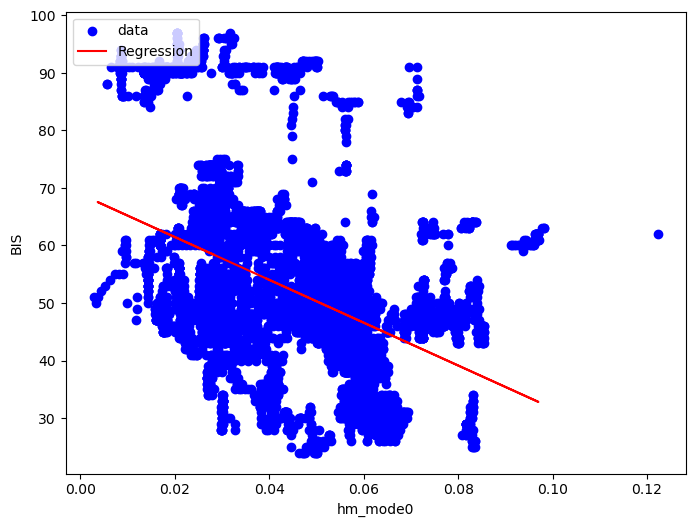

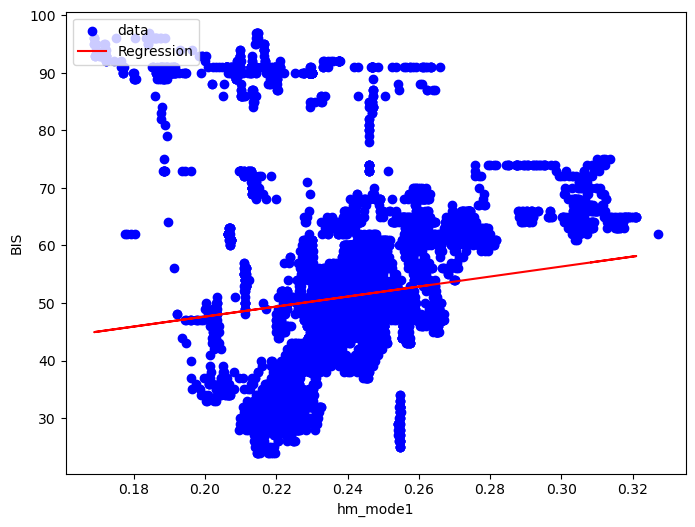

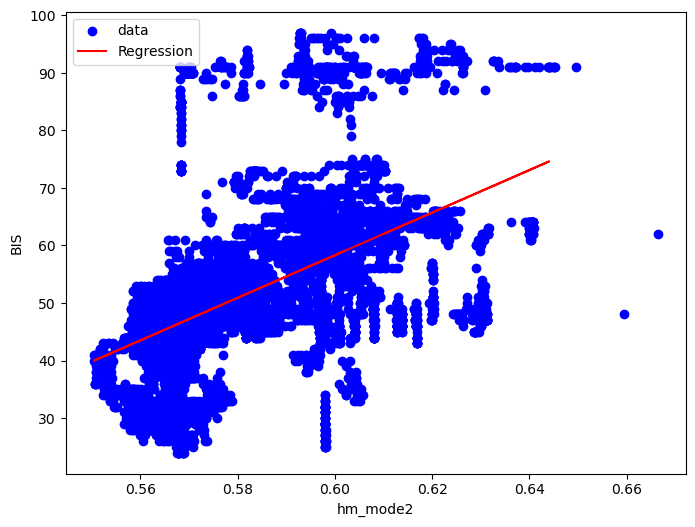

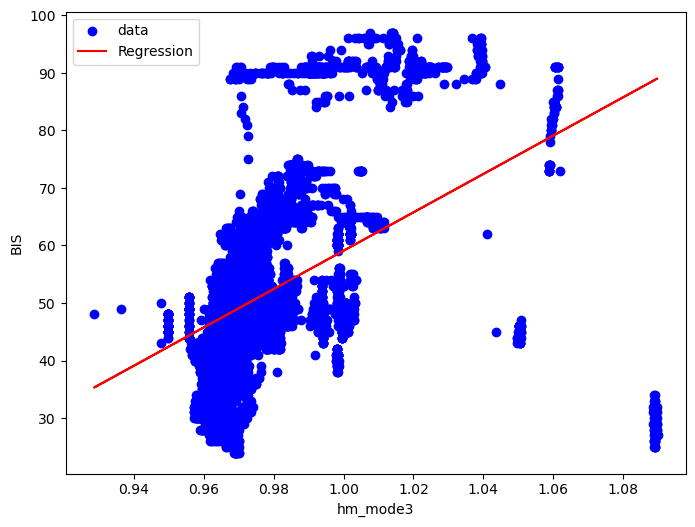

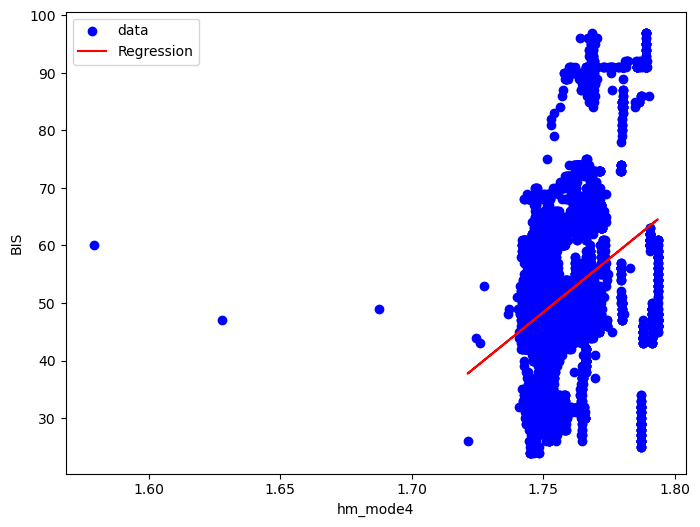

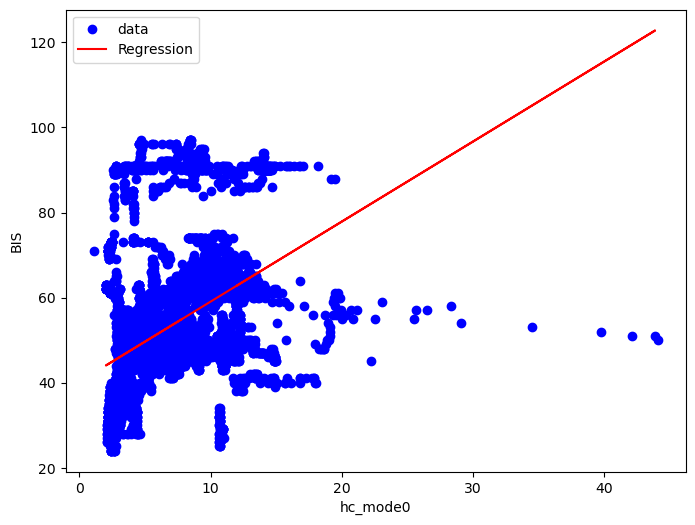

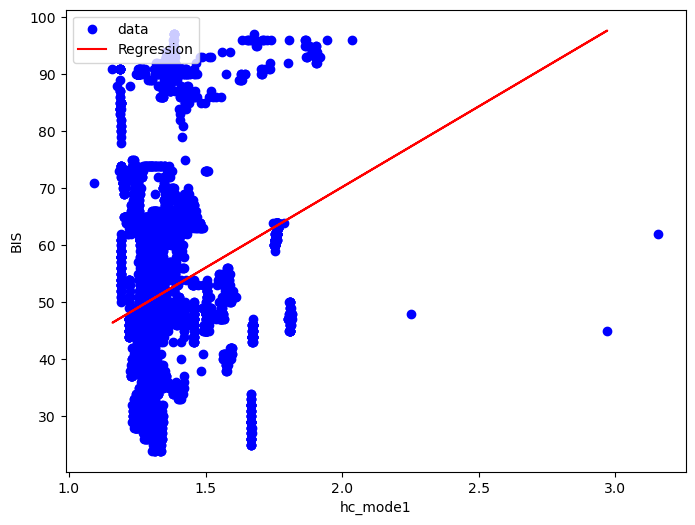

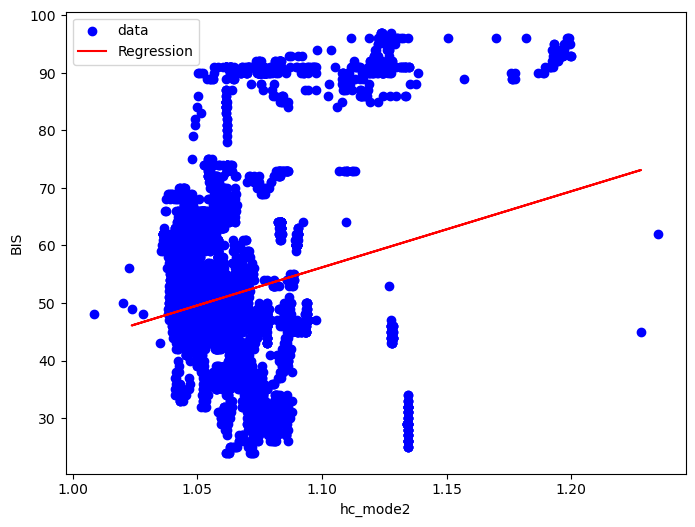

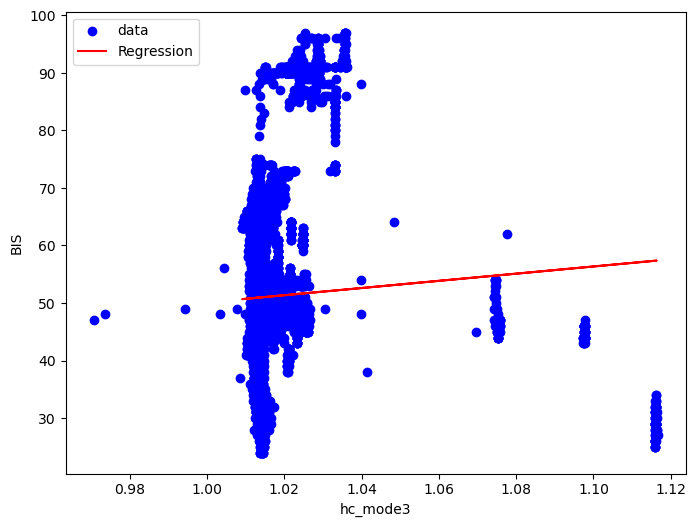

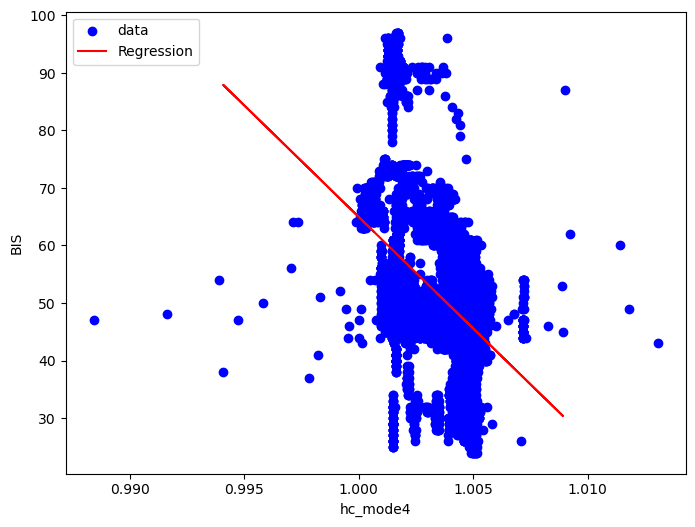

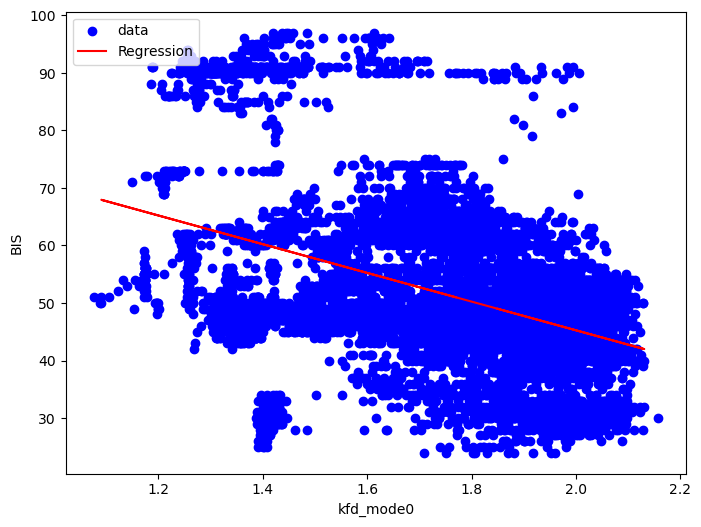

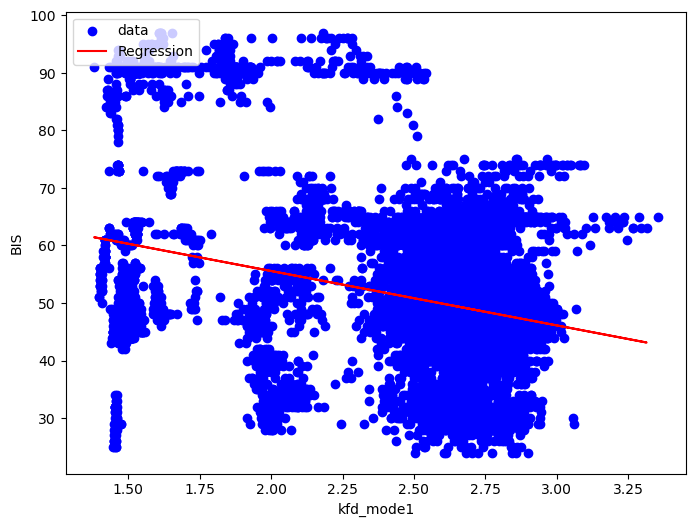

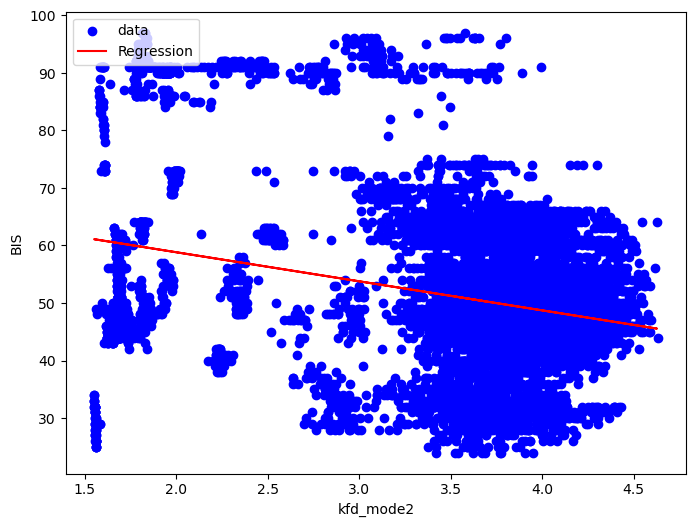

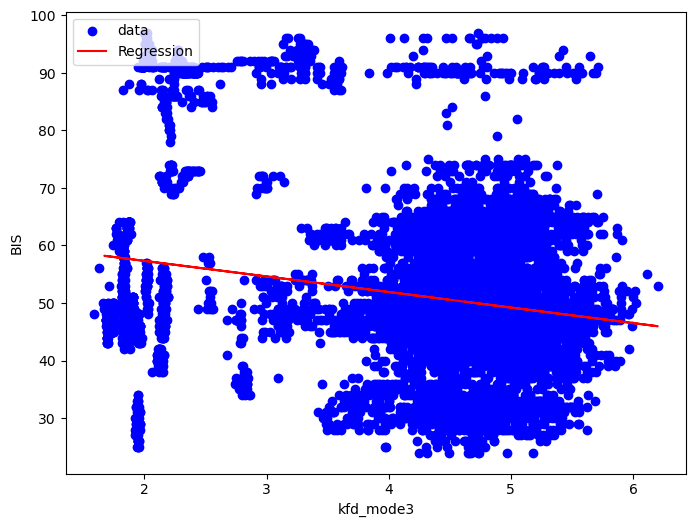

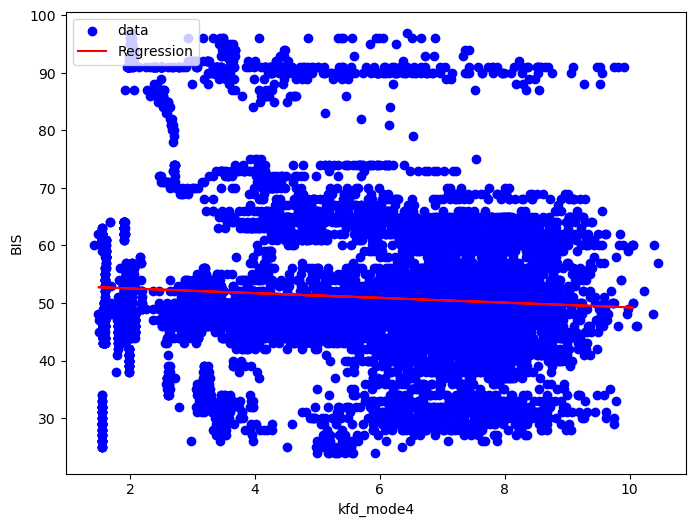

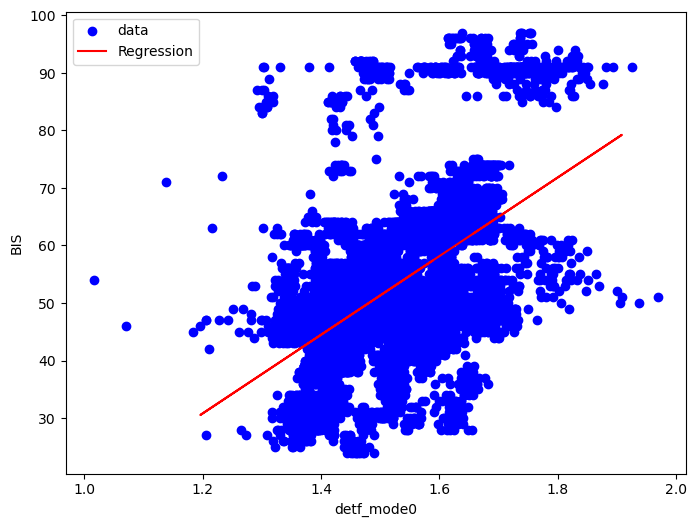

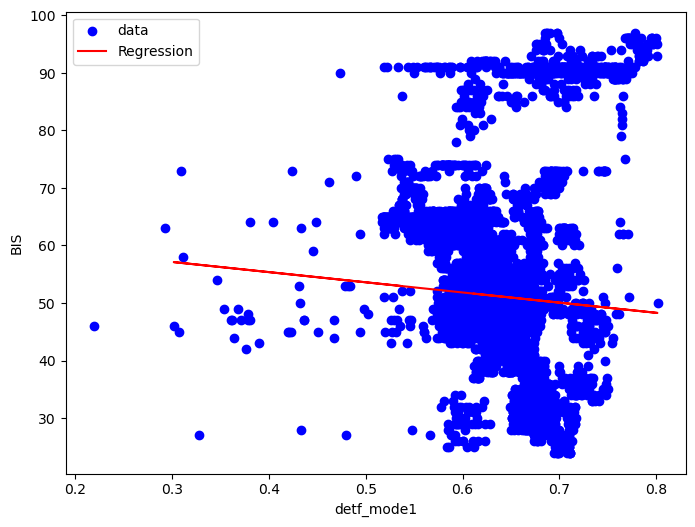

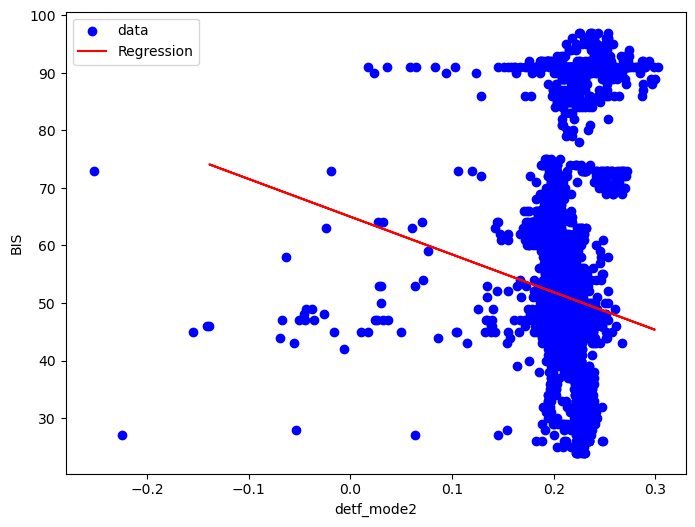

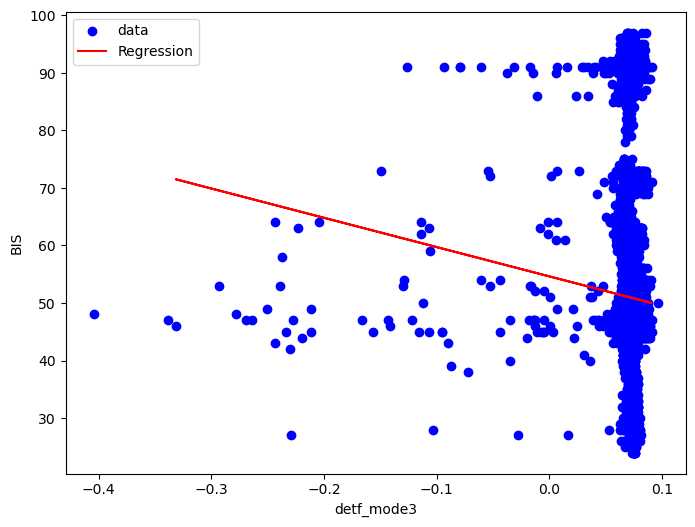

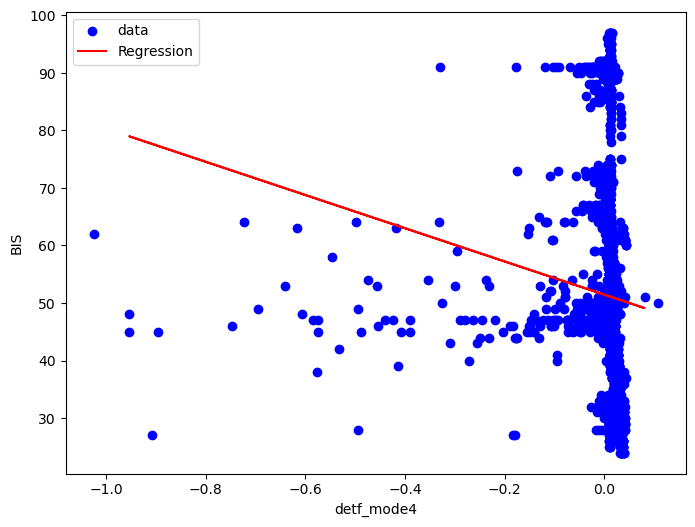

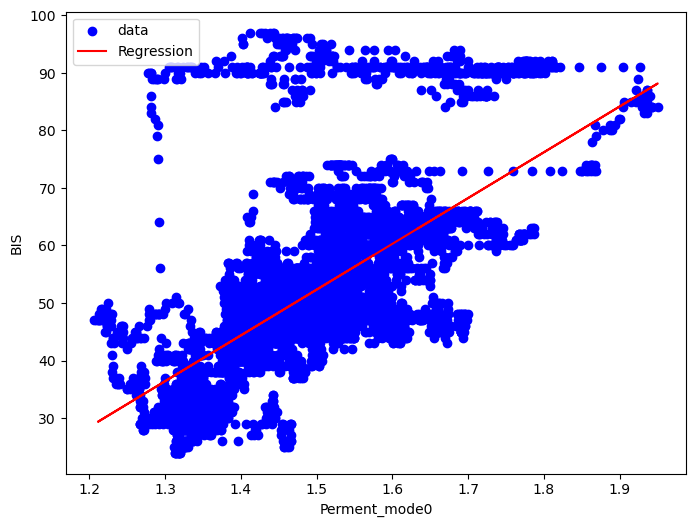

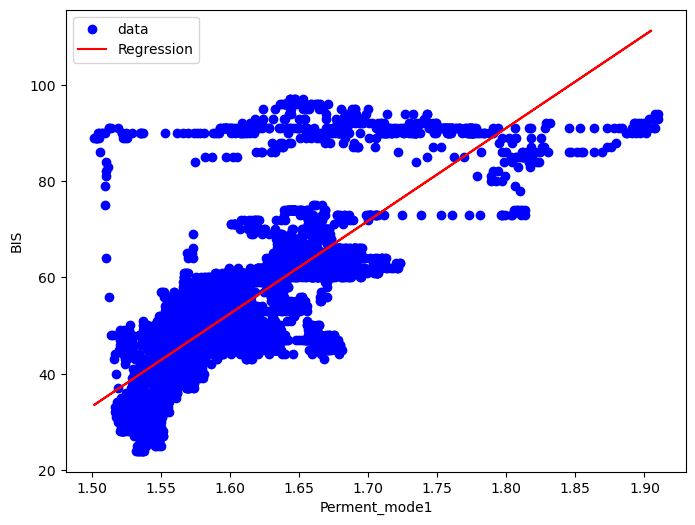

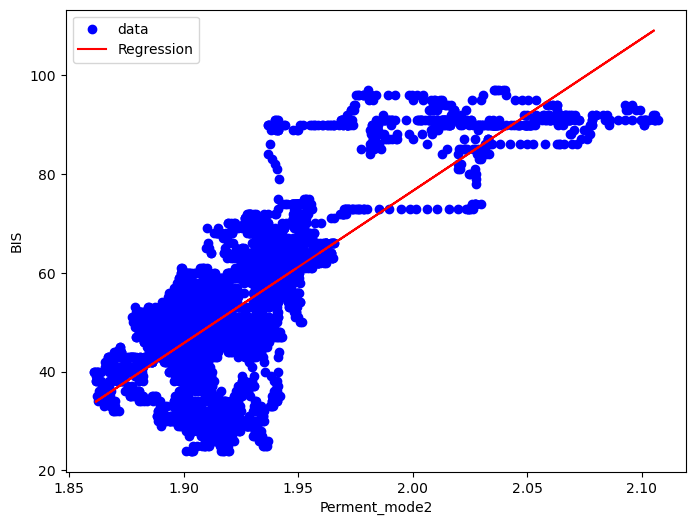

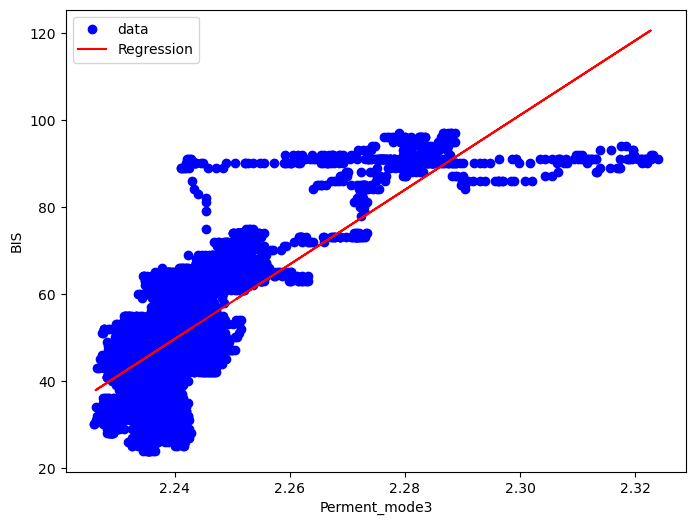

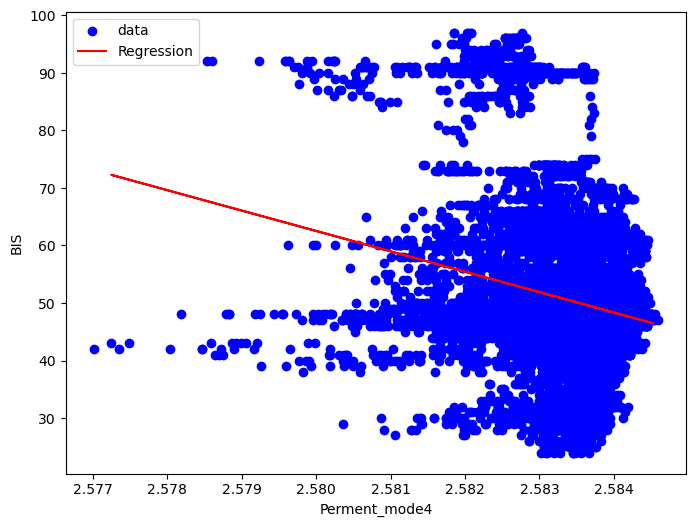

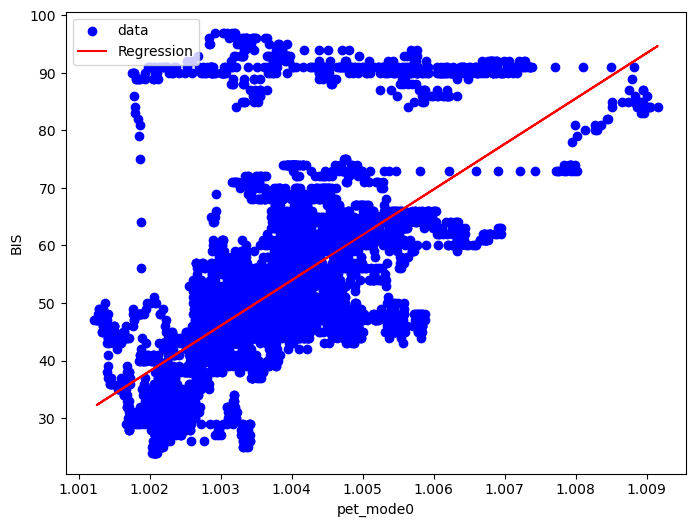

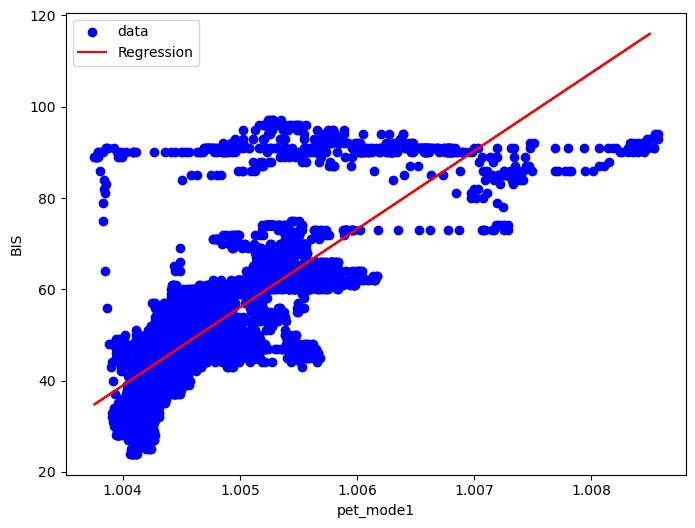

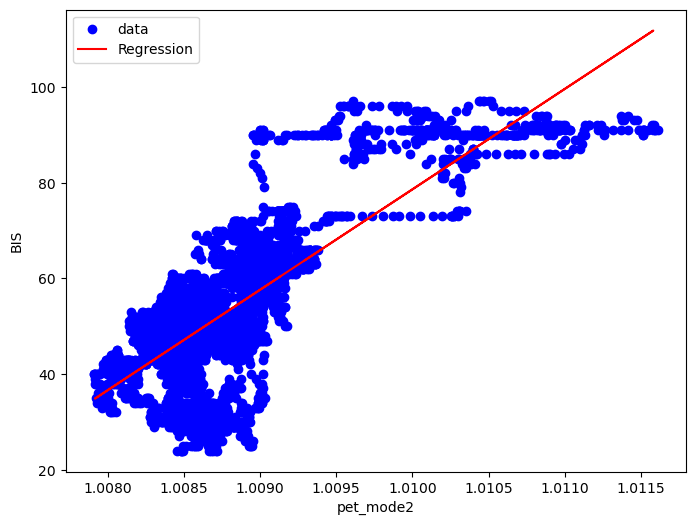

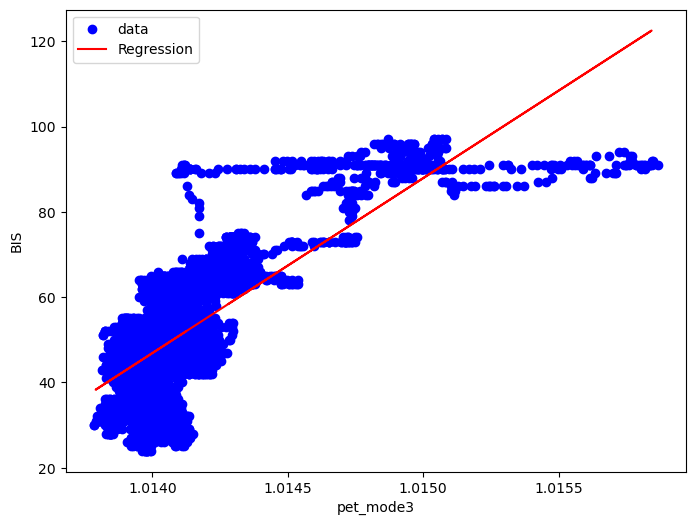

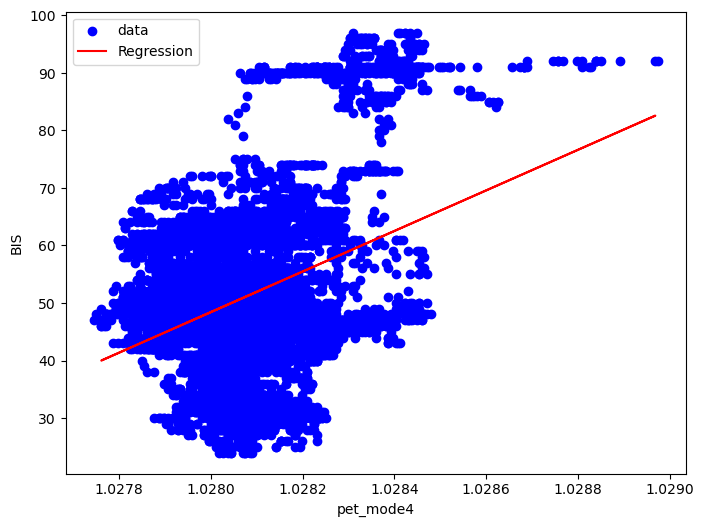

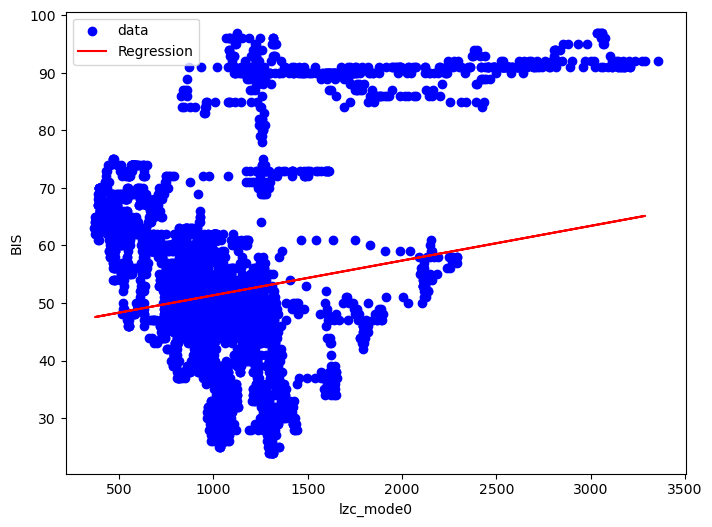

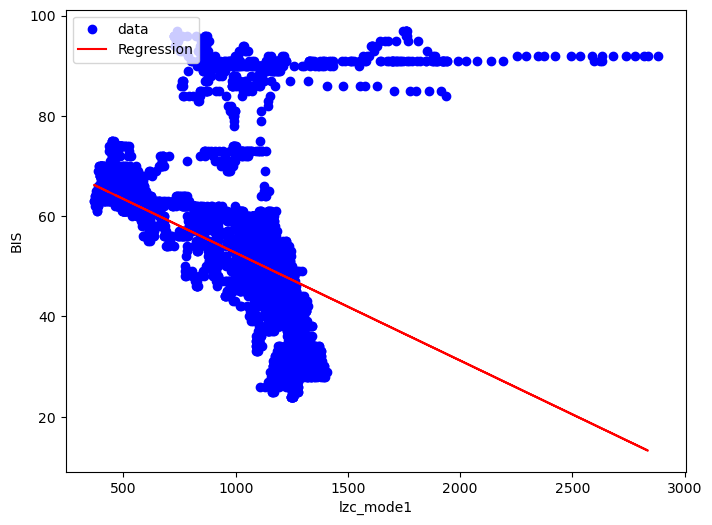

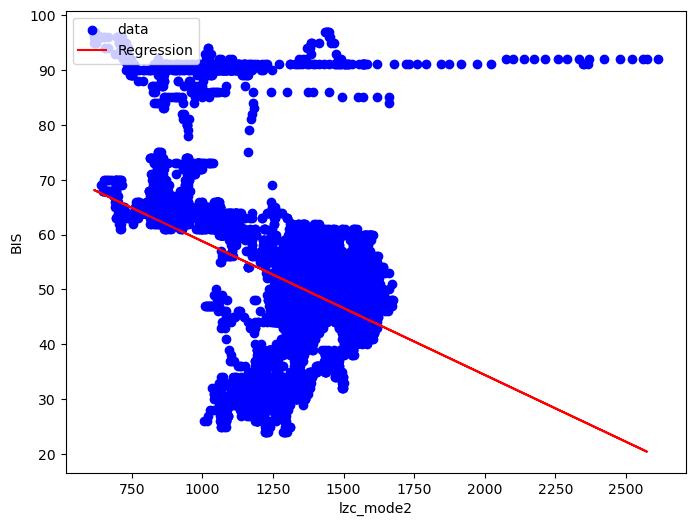

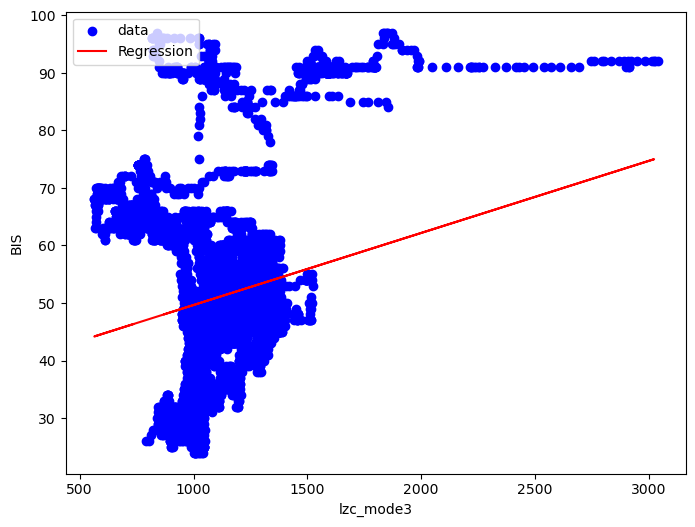

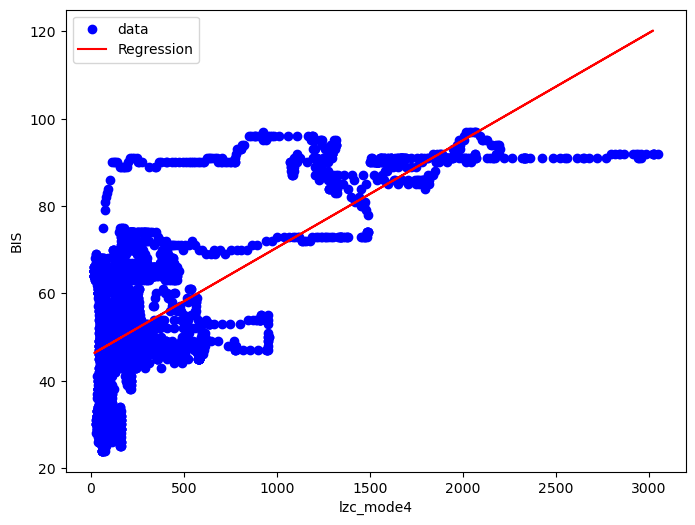

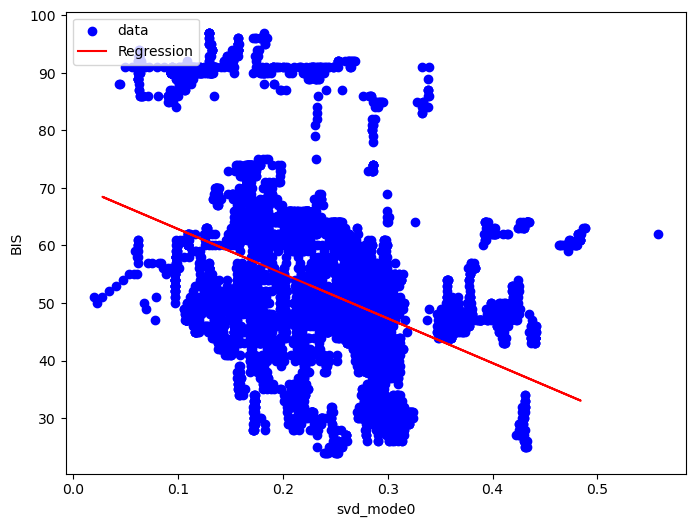

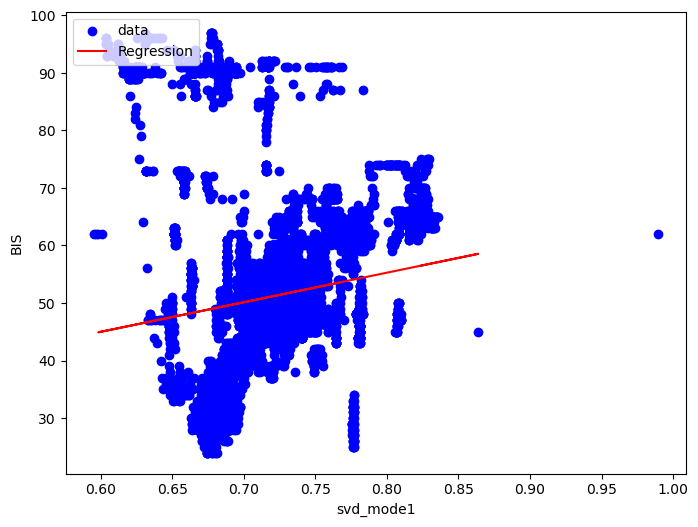

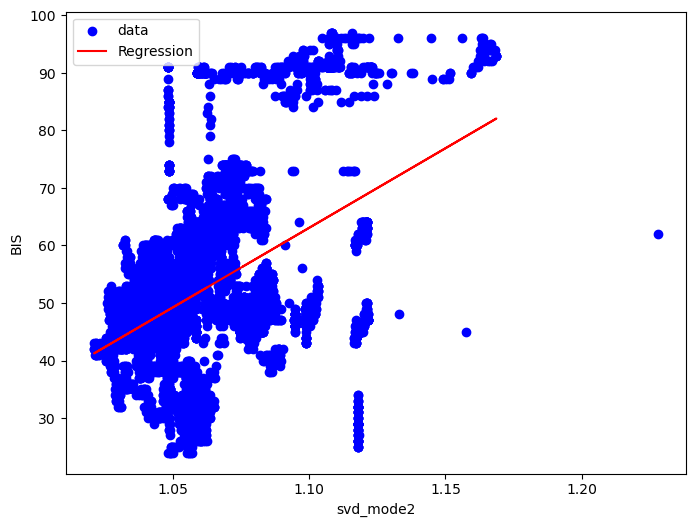

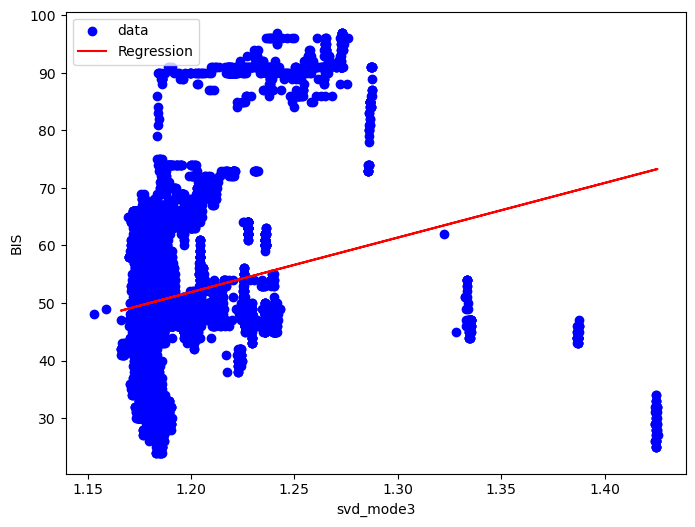

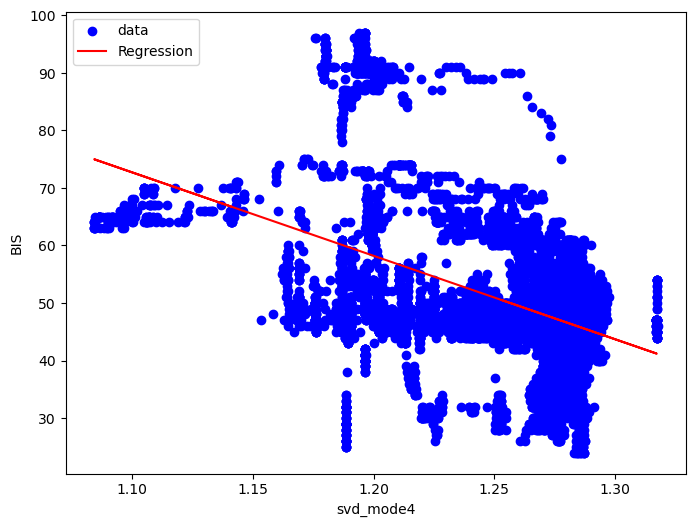

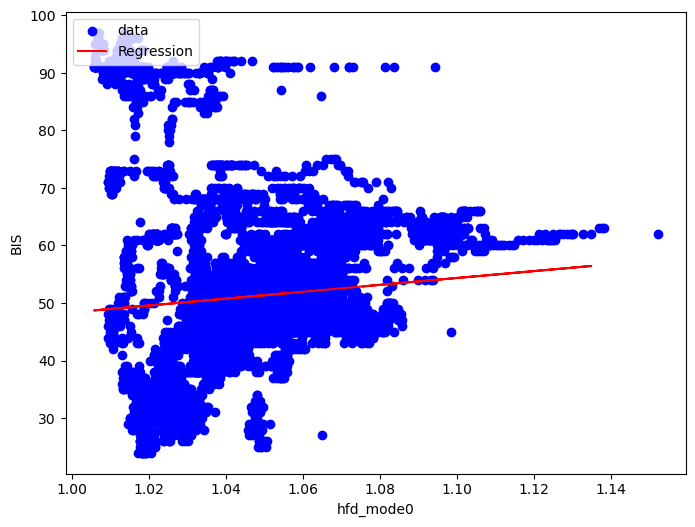

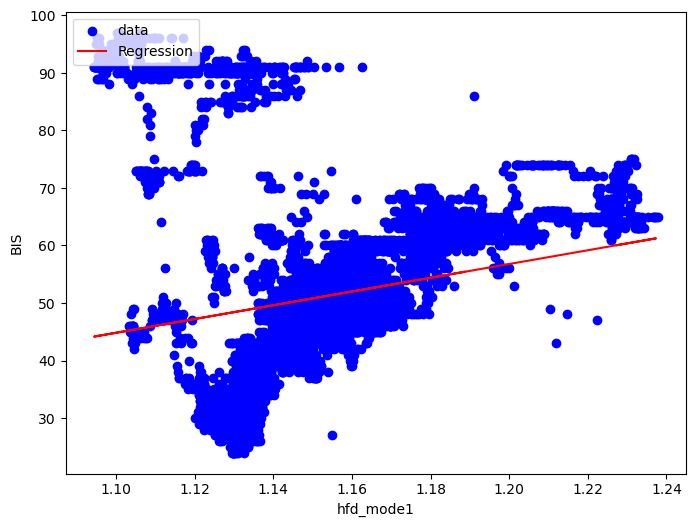

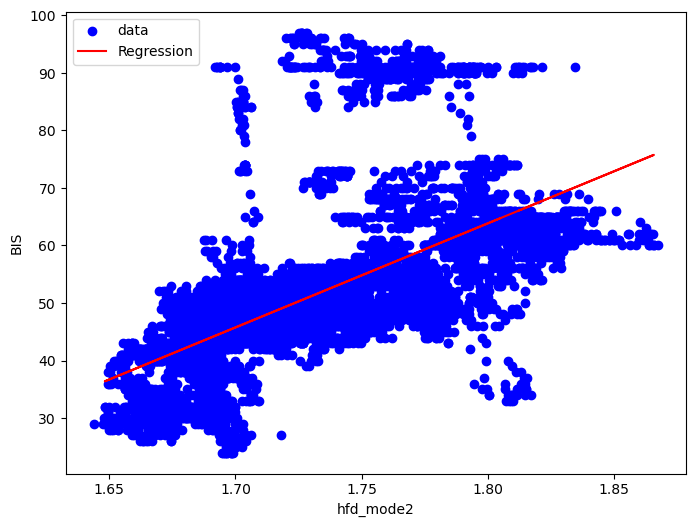

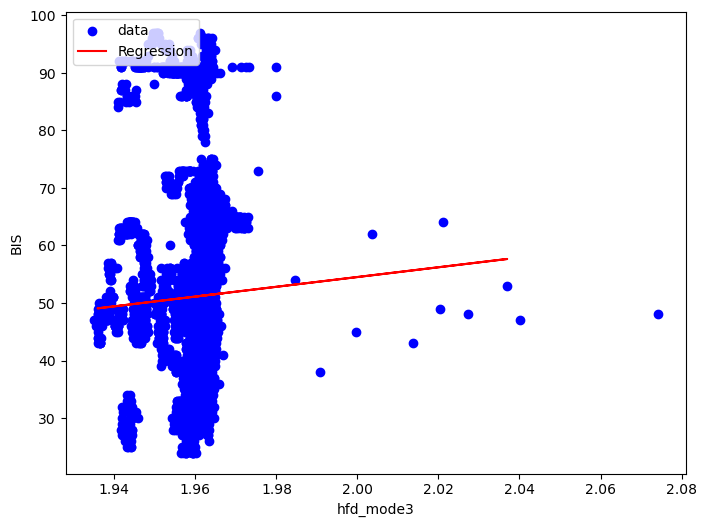

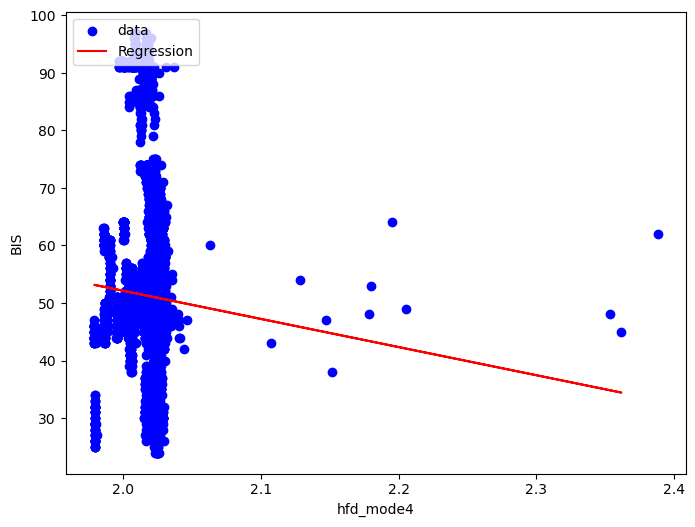

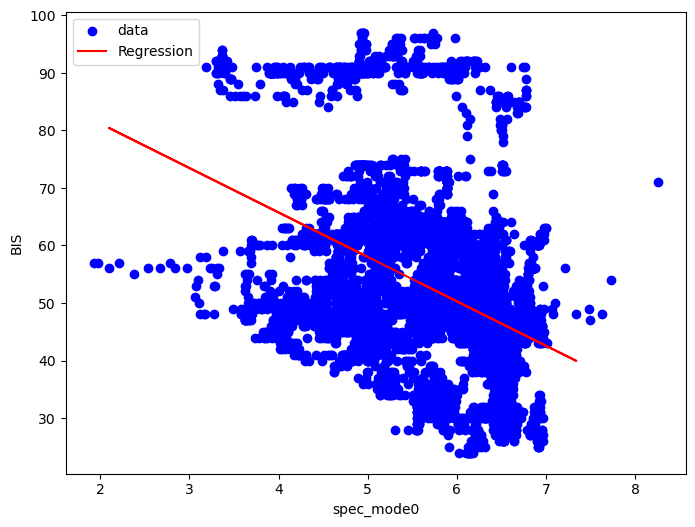

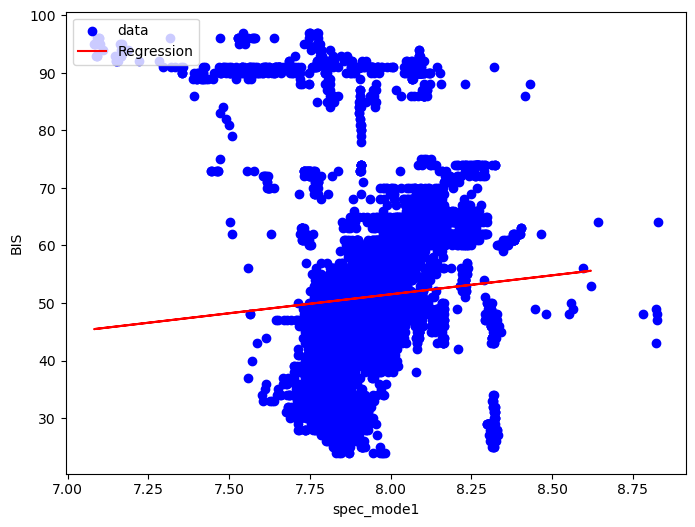

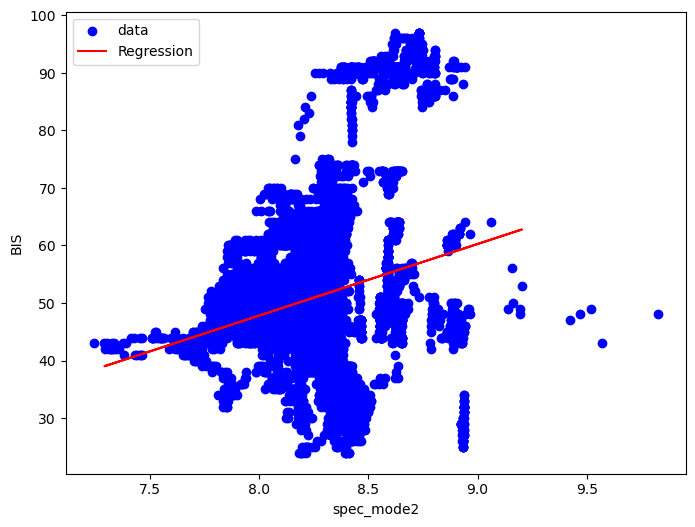

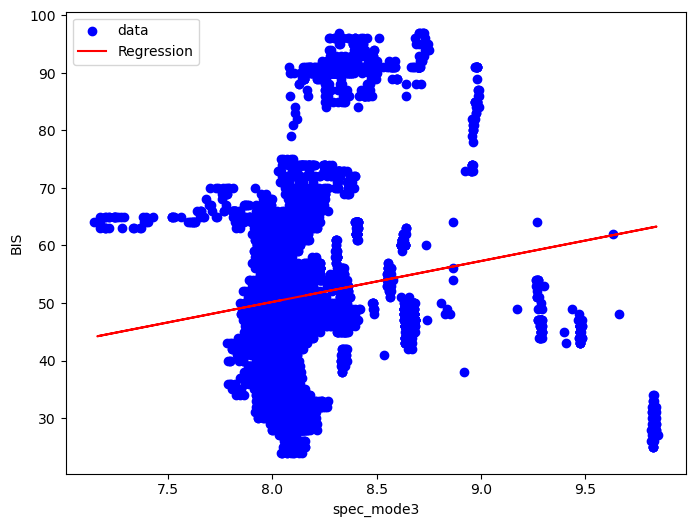

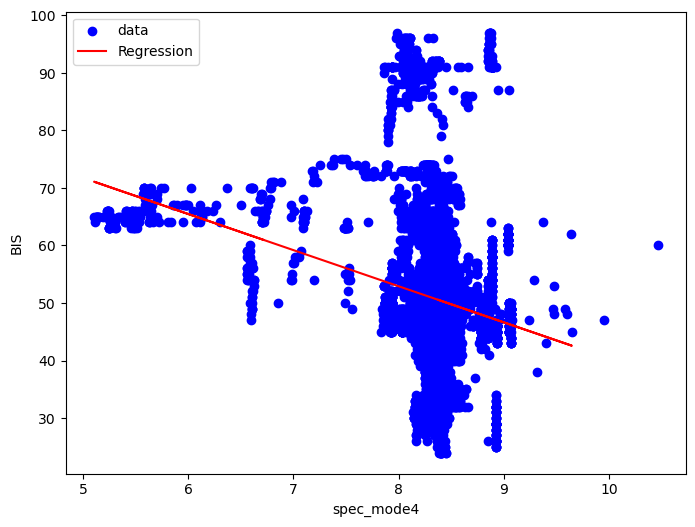

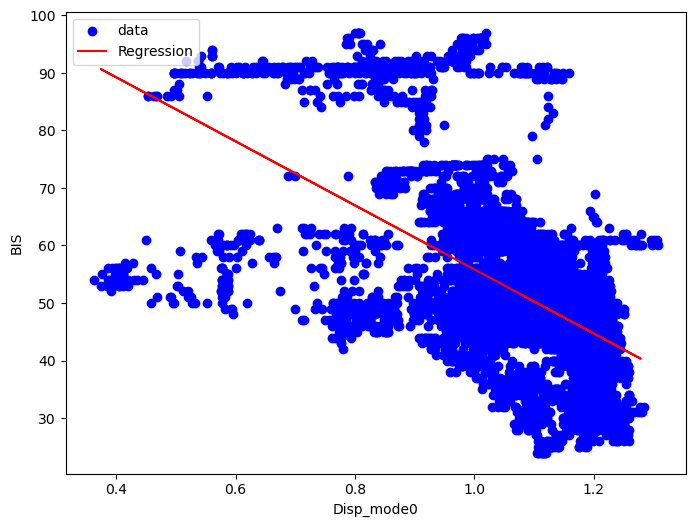

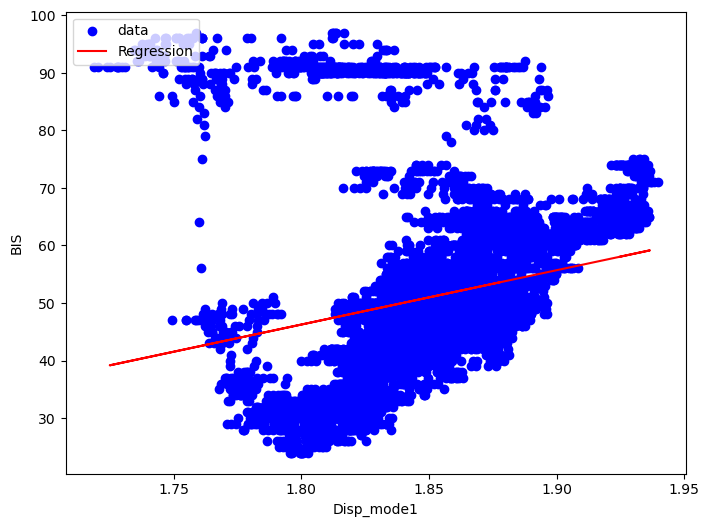

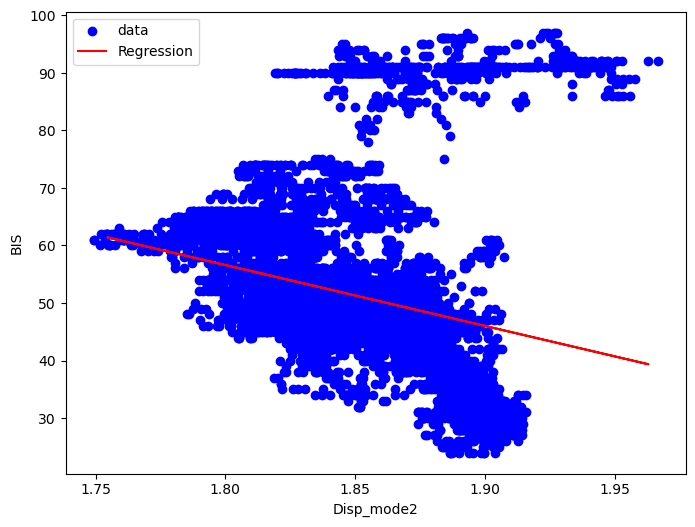

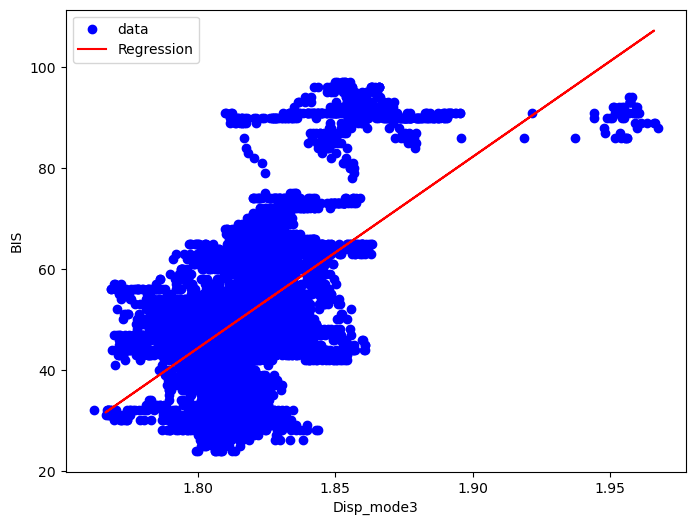

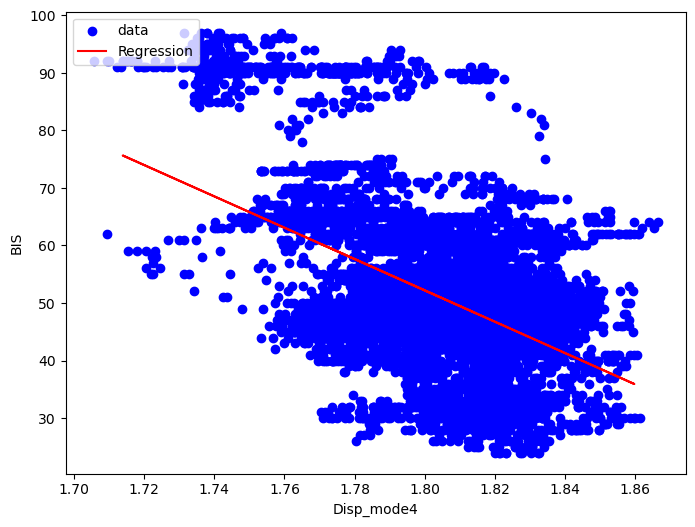

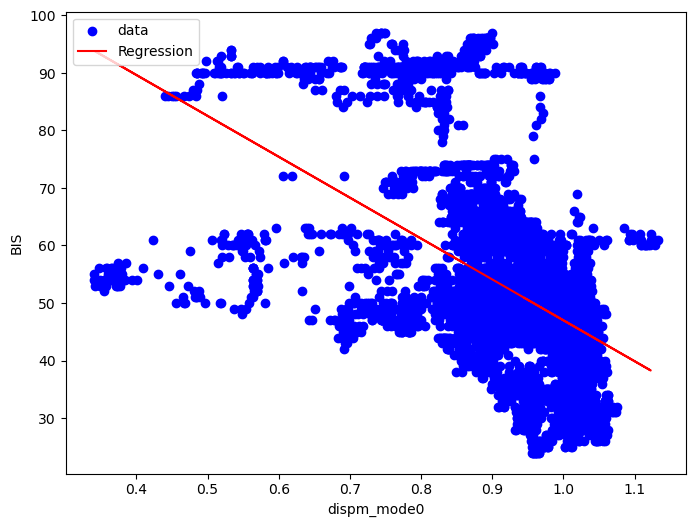

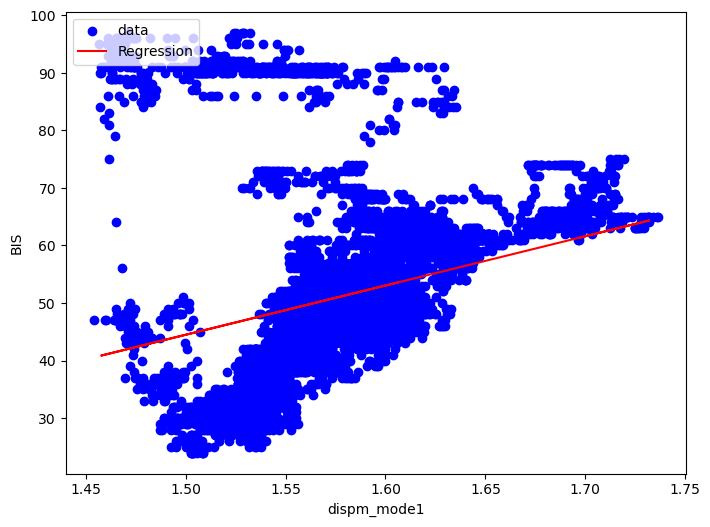

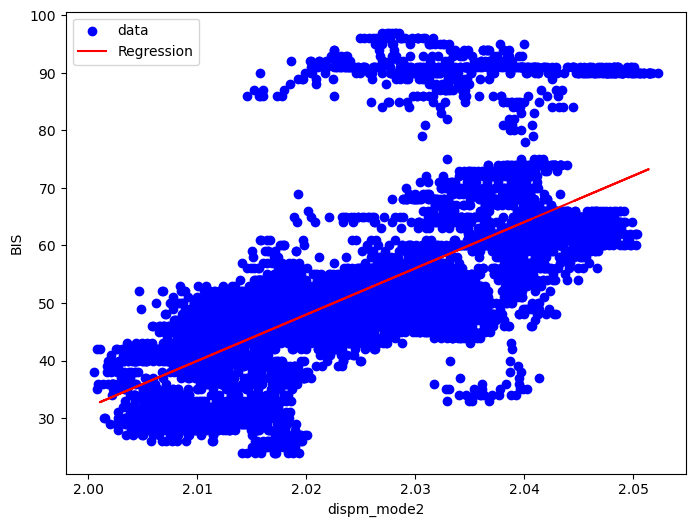

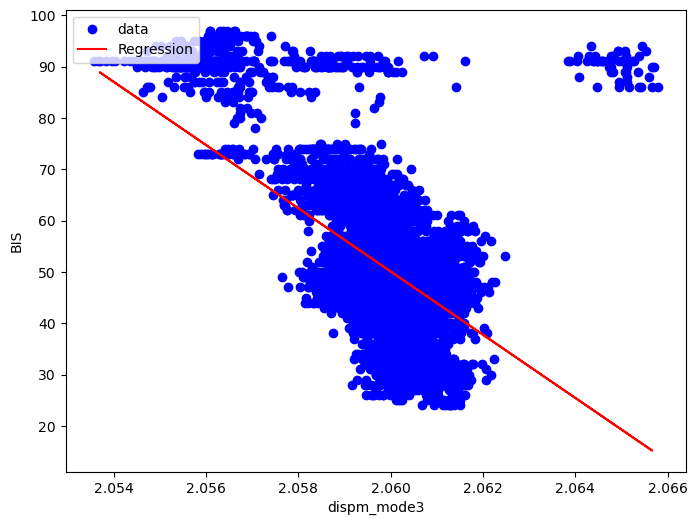

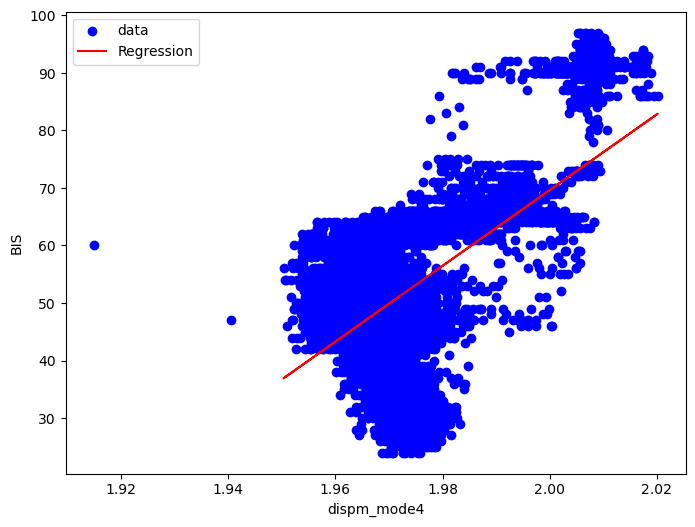

In [6]:

for column in patient_112.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_112, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
21,Perment_mode1_r2,59.787474
23,Perment_mode3_r2,58.840123
26,pet_mode1_r2,58.808687
28,pet_mode3_r2,58.154107
27,pet_mode2_r2,58.007556
22,Perment_mode2_r2,57.978225
57,dispm_mode2_r2,46.532592
34,lzc_mode4_r2,45.046700
42,hfd_mode2_r2,38.510718
25,pet_mode0_r2,38.338354


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
23  Perment_mode3    0.296016
28      pet_mode3    0.146474
42      hfd_mode2    0.106923
41      hfd_mode1    0.078428
59    dispm_mode4    0.051493
22  Perment_mode2    0.049180
21  Perment_mode1    0.046387
31      lzc_mode1    0.040759
27      pet_mode2    0.029866
32      lzc_mode2    0.029493
56    dispm_mode1    0.014657
30      lzc_mode0    0.008782
52     Disp_mode2    0.007780
36      svd_mode1    0.006491
1        hm_mode1    0.006287
50     Disp_mode0    0.005358
46     spec_mode1    0.005341
6        hc_mode1    0.005267
25      pet_mode0    0.004467
51     Disp_mode1    0.004329
19     detf_mode4    0.004112
5        hc_mode0    0.003749
57    dispm_mode2    0.003474
55    dispm_mode0    0.002894
33      lzc_mode3    0.002882
7        hc_mode2    0.002595
34      lzc_mode4    0.002453
16     detf_mode1    0.002295
38      svd_mode3    0.002267
3        hm_mode3    0.002150
8        hc_mode3    0.001860
20  Perment_mode0    0.001734
39      sv